In [9]:
import os
import cv2
import urllib
import numpy as np
import random
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from lib.layers import *
from lib.activations import *
from lib.metrics import Loss_CategoricalCrossentropy, Accuracy_Categorical
from lib.optimizers import *
from lib.model import *
from lib.dataset import ImageClassificationDataset

In [2]:
dataset = ImageClassificationDataset()
dataset.load("/home/deni/Cloud/Laptop/Projects/Python/cnn_from_scratch/dataset2", size=28, binary=False)
dataset.augment()
dataset.balance()
dataset.preprocess(
     white_balance = True
)
dataset.shuffle()
dataset.normalize()
dataset.reshape()

X_train, y_train, X_valid, y_valid, X_test, y_test = dataset.split()

Train batch contains 4_578 images
Validation batch contains 1_308 images
Test batch contains 654 images


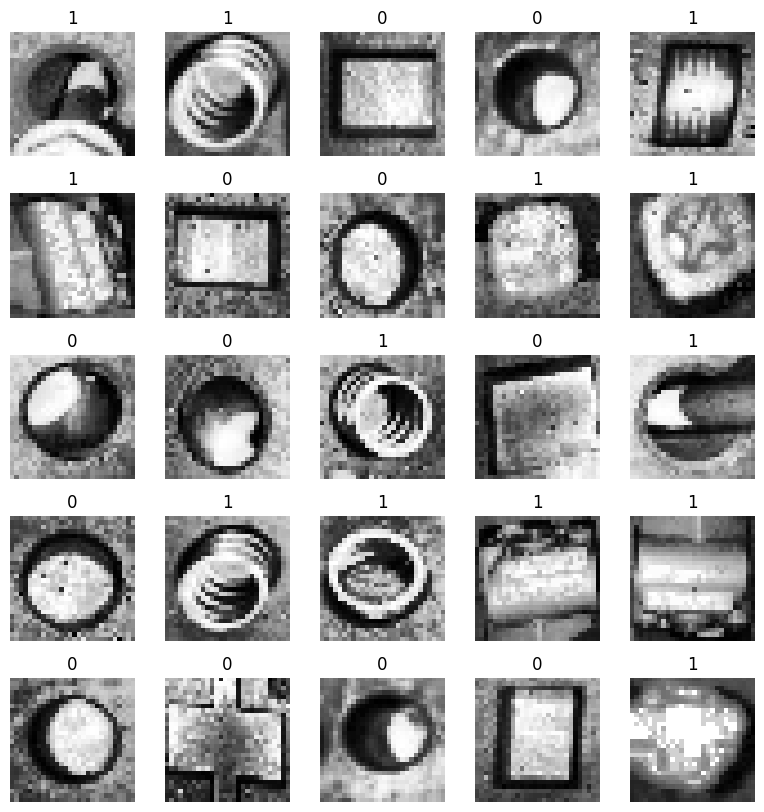

In [3]:
dataset.preview()

In [33]:
model = Model()
# Add layers
model.add(Layer_Dense(X_train.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, len(dataset.labels)))
model.add(Activation_Softmax())

model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=0.001, decay=0.001),
    accuracy=Accuracy_Categorical()
)

model.finalize()

model.train(
    X_train,
    y_train, 
    validation_data=(X_valid, y_valid),
    epochs=20, 
    batch_size=128,
    print_every=100
)

epoch: 1
    step: 0, acc: 0.477, loss: 0.922 (data_loss: 0.922,reg_loss: 0.000), lr: 0.001
    step: 35, acc: 0.786, loss: 0.430 (data_loss: 0.430,reg_loss: 0.000), lr: 0.0009661835748792271
training, acc: 0.704, loss: 0.559 (data_loss: 0.559, reg_loss: 0.000), lr: 0.0009661835748792271
validation, acc: 0.856,loss: 0.339

epoch: 2
    step: 0, acc: 0.852, loss: 0.339 (data_loss: 0.339,reg_loss: 0.000), lr: 0.0009652509652509653
    step: 35, acc: 0.888, loss: 0.261 (data_loss: 0.261,reg_loss: 0.000), lr: 0.0009337068160597573
training, acc: 0.879, loss: 0.300 (data_loss: 0.300, reg_loss: 0.000), lr: 0.0009337068160597573
validation, acc: 0.917,loss: 0.212

epoch: 3
    step: 0, acc: 0.938, loss: 0.213 (data_loss: 0.213,reg_loss: 0.000), lr: 0.0009328358208955224
    step: 35, acc: 0.939, loss: 0.139 (data_loss: 0.139,reg_loss: 0.000), lr: 0.000903342366757001
training, acc: 0.926, loss: 0.197 (data_loss: 0.197, reg_loss: 0.000), lr: 0.000903342366757001
validation, acc: 0.941,loss: 0.

In [34]:
model.evaluate(X_test, y_test) # Use test set

Evaluation, acc: 0.956, loss: 0.217


In [6]:
model.save("model.m")
model = Model.load("model.m")

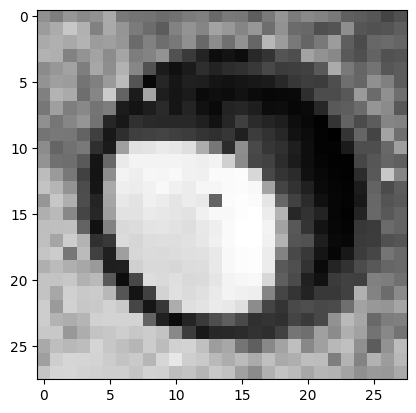

Prediction: 0, True: 0
Missing


In [48]:
fashion_mnist_labels = {
    0: 'Missing',
    1: 'Present'
}

img = random.randint(0, len(X_test)-1)

plt.imshow((X_test[img].reshape(28, 28)), cmap='gray')
plt.show()

prediction = model.predict(X_test[img])[0] # Pass image(s) in array
print(f"Prediction: {prediction}, True: {y_test[img]}")

print(fashion_mnist_labels[prediction])